# Model Description

This model is based on work by Guanella et al. 2007. For more details, see the reference:

Guanella, A., Kiper, D. & Verschure, P. A model of grid cells based on a twisted torus topology. Int. J. Neural Syst. 17, 231–240 (2007). 

## Activity and Stabilization
A set of $N$ comodular grid cells's activity is modeled. The activity of neuron $i$ at time $t$ is given by the following:

\begin{gather}
A_i(t) = B_i(t) + \tau\bigg(\frac{B_i(t)} {{<B_j(t-1)>}_{j=1}^{N}} - B_i(t)\bigg),
\end{gather}

where $\tau$ represents a stabilization factor, ${< \space .\space>}_{j=1}^{N}$ is the mean over cells in the network, and $B_i(t)$ is a linear transfer function defined as follows:

\begin{gather}
B_i(t) = A_i(t-1) + \sum_{j=1}^{N}A_j(t-1)w_{ji}(t-1),
\end{gather}

where $w_{ji}(t-1)$ is the weight from cell $j$ to cell $i$ at time $t-1$, with $i,j \in \{1, 2, ..., N \}$.

Neurons are initialized with random activity uniformly between $0$ and $1/\sqrt N$

## Attractor Dynamics
When the agent is stationary, the weight between neuron $i$ and $j$ is defined as follows:

\begin{gather}
w_{ij} = I \exp \bigg(- \frac{||c_i - c_j||^2_{tri}} {\sigma^2}\bigg) - T
\end{gather}

The weight is dependent on the relative "positions" of cells $i$ and $j$. The position of neuron $i$ is defined as ${c_i}$ $= (c_{i_{x}}\space ,\space c_{i_{y}})$, $ c_{i_{x}} = (i_x− 0.5)/N_x $, $ c_{i_{y}} = \frac{\sqrt3}{2} (i_y− 0.5)/N_y$ with $i_x \in \{1, 2, ..., N_x\}$ and $i_y \in \{1, 2, ..., N_y\}$, and where $N_x$ and $N_y$ are the number of columns and rows
in the cells matrix and $i_x$ and $i_y$ the column and the row numbers of cell $i$. 

Additionally, global parameters that govern the relationship between all pairs of cells include $I$, the intensity parameter, $\sigma$ the size of the Gaussian, $T$ the shift parameter (see the referenced paper for more details).

Finally, the key to getting triangular grid instead of square ones is to use a distance metric defined as follows: 
$\text{dist}_{tri}({c_i}$ $, $ $ c_j$ $)$ := $\| c_i− c_j \|_{tri} = \text{min}_{k=1}^7 \| c_i $ $− \space  c_j$ $+  \space s_k\|$, 

where

$s_1 := (0, 0)$

$s_2 := (−0.5, \frac{\sqrt3}{2})$

$s_3 := (−0.5, -\frac{\sqrt3}{2})$

$s_4 := (0.5, \frac{\sqrt3}{2})$

$s_5 := (0.5, -\frac{\sqrt3}{2})$

$s_6 := (−1, 0)$

$s_7 := (1, 0)$

and where $\| \space . \space \|$ is the Euclidean norm.

## Modulation
When the agent is moving, the weight between neurons $i$ and $j$ becomes modulated by the velocity $v := (v_x, v_y)$. In essence, the synaptic connections of the network shift in the direction of the agent. This modulation is expressed as follows:
\begin{gather}
w_{ij}(t) =  I \exp \bigg(- \frac{\|c_i - c_j+ \alpha R_{\beta}v(t-1)\|^2_{tri}} {\sigma^2}\bigg) - T
\end{gather}

The scale and orientation of the grid is dictated by the gain factor $\alpha \in \mathbb{R}^+$ and bias $\beta \in [0, π/3]$. The input of the network is thus modulated and biased by the gain and the bias parameters, with $v \longmapsto \alpha R_{\beta}v$ , where $R_{\beta}$ is the rotation matrix of angle $\beta$ defined by
\begin{gather}
R_{\beta} = \begin{bmatrix}
\cos(\beta) & -\sin(\beta) \\
\sin(β) & cos(β)\end{bmatrix}
\end{gather}

## Modifications
This model is modified in two key ways from the model described in Guanella et al 2007. The first modification allows for added heading direction noise at each timestep, and the second introduces landmark inputs to the grid cell network. Heading direction noise is added as $\beta_{\text{noisy}}(t) = \beta + \sigma_{\beta} r(t)$, where $\beta$ is the unmodified bias, $\sigma_{\beta}$ regulates the extent of noise, and $r(t)$ is drawn from the standard normal distribution, and $\beta_{\text{noisy}}(t)$ is still constrained such that $\beta_{\text{noisy}}(t) \in [0, π/3]$ The rotation matrix is then calculated using $\beta_{\text{noisy}}(t)$.

Landmark inputs are added with the addition of landmark cells and their unidirectional excitatory synaptic connections to grid cells. When landmarks are present, each landmark $L_{l}$ is associated with its own dedicated landmark cell population. A given landmark cell's activity $A_{L_{l_m}}$ is dependent on the agent's proximity to the landmark's position, where $l \in \{1, ..., N_L\}$ and where $N_L$ is the number of landmarks present and $m \in \{1, ..., N_{Ln}\}$ where $N_{Ln}$ is a global parameter setting the number of landmark cells dedicated to any given landmark. The activity of landmark cell $A_{L_{l_m}}$ is defined as

\begin{gather}
A_{L_{l_m}} = \begin{cases} 
\alpha_{L_l} \exp \bigg(- \frac{\|p(t) - p_{L_l}\|^2} {\big(\frac{1}{2} q_{L_l}\big)^2} \bigg) &  \text{if} \space ||p(t) - p_{L_l}|| \leq q_{L_l} \\
0 & \text{otherwise},
\end{cases}
\end{gather}

where the strength of landmark $L_l$ is governed by $\alpha_{L_l} \in \mathbb{R}^+$, $p(t):= (p_x(t), p_y(t))$ is the position of the agent at time $t$, $p_{L_l} := (p_{L_{l_x}}, p_{L_{l_y}})$ is the position of $L_l$, and $q_{L_l} \in \mathbb{R}^+$ represents the lookahead distance at which landmark $L_l$ begins recruiting the activity of its landmark cells. To incorporate input from landmark cells, the linear transfer function is modified as follows:

\begin{gather}
B_i(t) = A_i(t-1) + \sum_{j=1}^{N}A_j(t-1)w_{ji}(t-1) + \sum_{l=1}^{N_{L}} \sum_{m=1}^{N_{Ln}} A_{L_{l_m}}(t-1) w_{l_m i}(t-1)
\end{gather}

where $w_{l_mi}$ is the weight from landmark cell $m$, which responds to landmark $l$, to grid cell $i$.

A model containing a Hebbian plasticity term between landmark cells and grid cells makes the following modifications:
1. The weight between each landmark cell and the $N$ grid cells is initialized randomly with values between $0$ and $1/\sqrt N$
2. Hebbian plasticity allows changes in weights between landmark cells and grid cells as follows:

$w_{l_mi}(t) = w_{l_mi}(t-1) + \alpha_{\text{hebb}} (A_i(t-1) A_{L_{m_i}}(t-1)) - \alpha_{\text{decay}}$

where $ \alpha_{\text{hebb}}$ regulates the extent of Hebbian potentiation and $ \alpha_{\text{decay}}$ provides a constant decay factor. Weight values are constrained to be between some minimum $W_{L_{\text{min}}}$ and maximum $W_{L_{\text{max}}}$

# Connect to GPU (optional)
The tri-norm calculation is computationally intense and benefits from being run on a GPU. If you'd like to run this notebook with GPU acceleration, follow the instructions below.

If you're running this notebook on Google Colab, you'll need to follow these instructions for enabling the GPU:
1. Under Edit, choose Notebook Settings.
2. Select GPU from Hardware Accelerator.

This will connect you to a GPU provided by Google. 

If you're running this locally and would like to run on a GPU, then follow the instructions on setting up for GPU acceleration in the README. If you'd like to run on CPU, then set use_GPU = False. If you do not have access to a GPU, the CPU will be used.

In [1]:
# try:
#     import google.colab
#     !pip install --index-url https://download.pytorch.org/whl/cu118
# except:
#     print("(Not on Google Colab)")
#     # raise ValueError("Not on Google Colab")

# Import Functions

In [2]:
# Change this if you do not want to use the GPU
use_GPU = True

In [3]:
# Check if TTGC installed
try:
    import ttgc
except ImportError as e:
    !pip install ttgc

from ttgc import *

import numpy as np
from scipy.ndimage import gaussian_filter1d

import csv
import urllib.request
from pathlib import Path

from matplotlib import pyplot as plt
plt.rcParams["image.cmap"] = "magma"
%config InlineBackend.figure_format = 'retina'

# Basic Functions

## Set up grid cell network

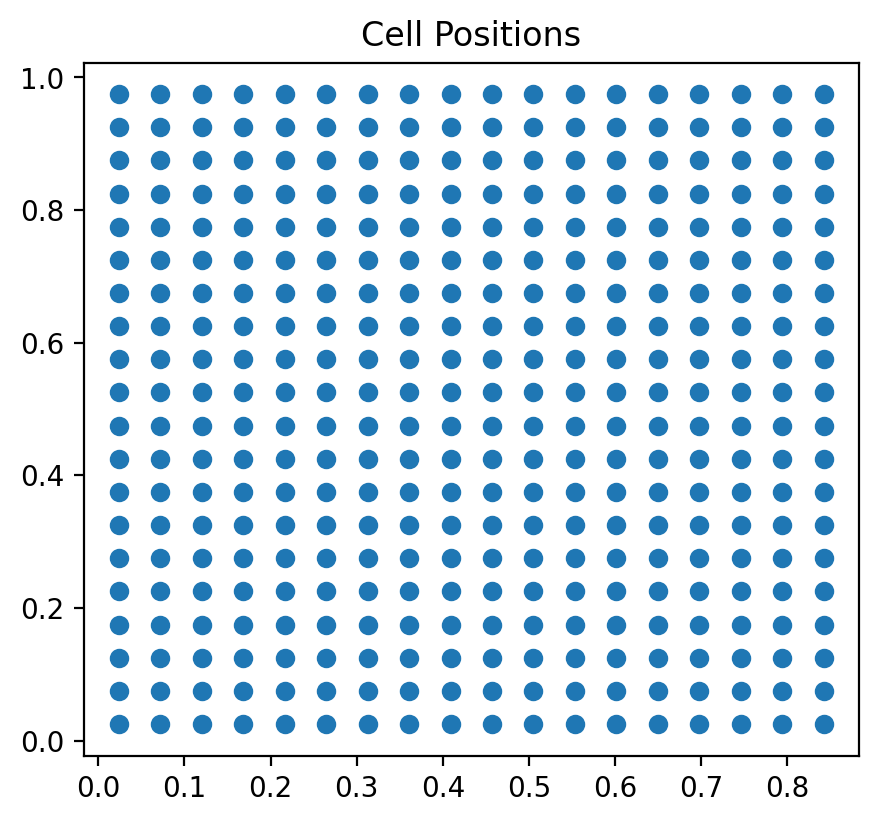

In [4]:
n_x = 20 # column n
n_y = 18 # row n
N = n_x * n_y

# Create rectangular array of grid cells
cell_positions = initialize.calc_cell_positions(n_y, n_x)
cell_positions_plot = cell_positions.reshape(2, -1, order='F')

# Show cell positions
plt.figure(figsize=(5, 4.5))
_ = plt.scatter(cell_positions_plot[0], cell_positions_plot[1])
_ = plt.title('Cell Positions')

## Different ways of calculating distance

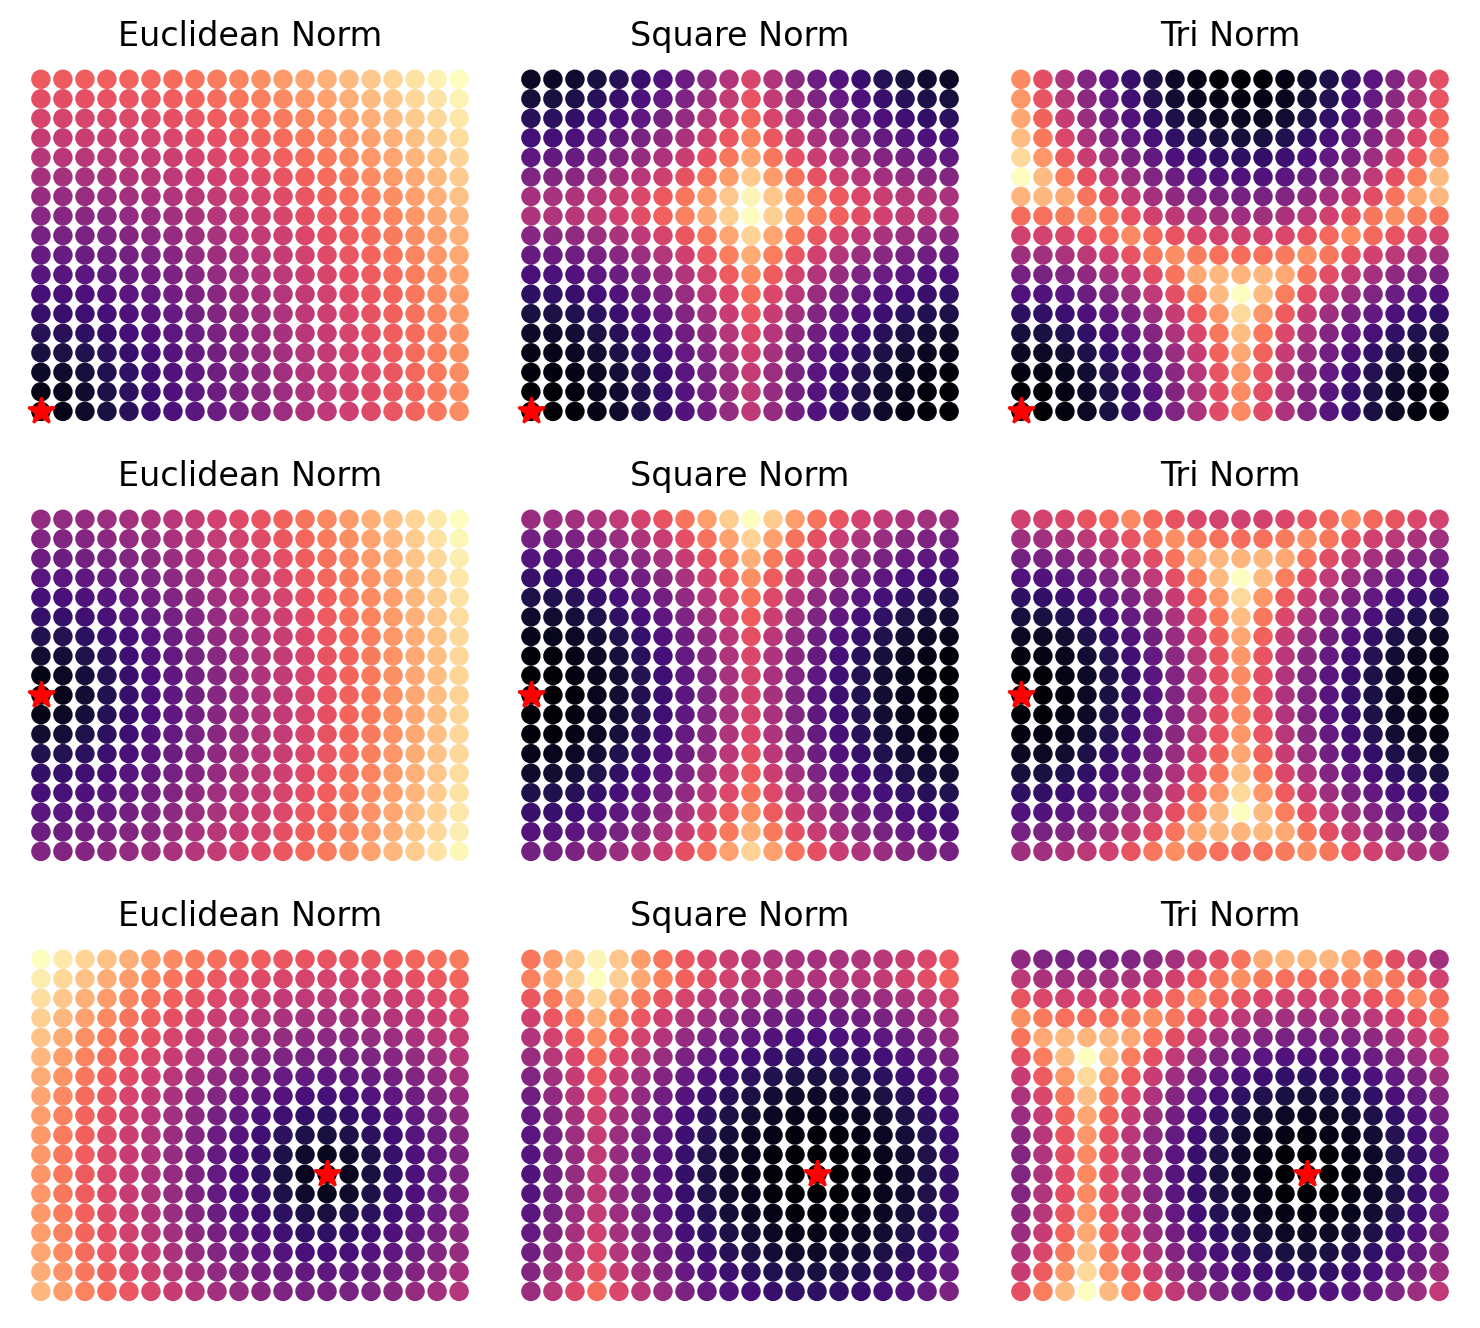

In [5]:
# Calculate Euclidean norm, square norm, and tri-norm distances from one cell to all other cells
cell_idxs = [0, n_y//2-1, n_y*n_x*2//3]
n_cells = len(cell_idxs)
cell_position_diffs = initialize.calc_cell_position_diffs(cell_positions)

plt.figure(figsize=(7.5, 2.25*n_cells))
for c in range(n_cells):
    cell_idx = cell_idxs[c]
    cell_diff_pos = cell_position_diffs[:, cell_idx, :]
    cell_euc_norm = np.linalg.norm(cell_diff_pos, axis=0)
    cell_square_norm = update.calc_square_dist_squared(cell_diff_pos, use_GPU)
    cell_tri_norm = update.calc_tri_dist_squared(cell_diff_pos, use_GPU)
    
    plt.subplot(n_cells,3,3*c+1)
    _ = plt.scatter(cell_positions_plot[1], cell_positions_plot[0], c=cell_euc_norm)
    _ = plt.plot(cell_positions_plot[1, cell_idx], cell_positions_plot[0, cell_idx], 'r*', ms=10)
    _ = plt.title('Euclidean Norm')
    plt.axis('off')
    
    plt.subplot(n_cells,3,3*c+2)
    _ = plt.scatter(cell_positions_plot[1], cell_positions_plot[0], c=cell_square_norm)
    _ = plt.plot(cell_positions_plot[1, cell_idx], cell_positions_plot[0, cell_idx], 'r*', ms=10)
    _ = plt.title('Square Norm')
    plt.axis('off')
    
    plt.subplot(n_cells,3,3*c+3)
    _ = plt.scatter(cell_positions_plot[1], cell_positions_plot[0], c=cell_tri_norm)
    _ = plt.plot(cell_positions_plot[1, cell_idx], cell_positions_plot[0, cell_idx], 'r*', ms=10)
    _ = plt.title('Tri Norm')
    plt.axis('off')
    
plt.tight_layout()

## Tri-norm metric and weights

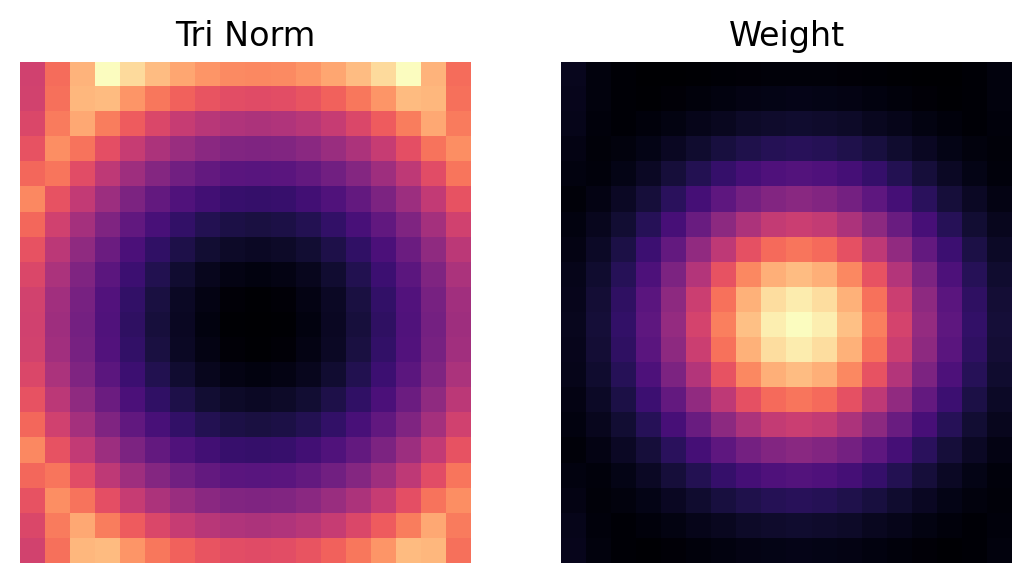

In [6]:
# Calculate tri_norm
cell_idx = n_y * n_x // 2 + n_y // 2
cell_diff_pos = cell_position_diffs[:, cell_idx, :]
cell_tri_norm = update.calc_tri_dist_squared(cell_diff_pos, use_GPU)

# Weight is calculated as I*exp(-distance / sigma) - T
alpha_sim = 0.08
beta_sim = np.pi/6
velocity = np.zeros((2,1))
I_sim = 0.20
sigma_sim = 0.26
T_sim = 0.04
tau_sim = 0.9
W, _ = update.calc_weight_mat(cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, velocity, I_sim, sigma_sim, T_sim, use_GPU)

plt.subplot(1,2,1)
plt.imshow(cell_tri_norm.reshape(n_x, n_y))
_ = plt.title('Tri Norm')
plt.axis('off')

plt.subplot(1,2,2)
_ = plt.imshow(W[cell_idx].reshape(n_x, n_y))
_ = plt.title('Weight')
_ = plt.axis('off')

## Effect sigma on weights

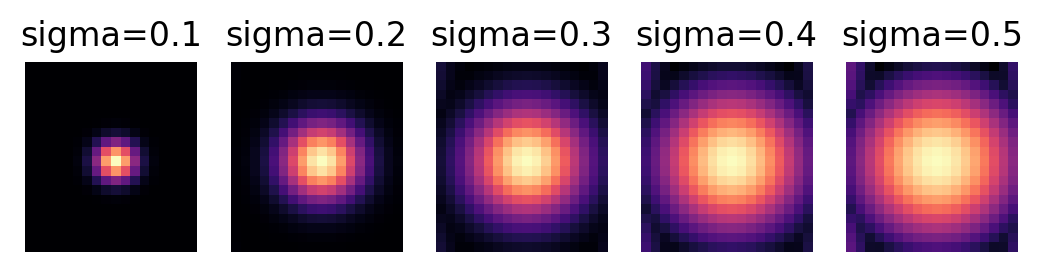

In [7]:
# Vary sigma values
all_sigmas = np.linspace(0.1, 0.5, 5)

# Increasing sigma values
plt.figure()
for s_idx in range(len(all_sigmas)):
    W, _ = update.calc_weight_mat(cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, velocity, I_sim, all_sigmas[s_idx], T_sim, use_GPU)

    plt.subplot(1,5,s_idx+1)
    _ = plt.imshow(W[cell_idx].reshape(n_x, n_y))
    _ = plt.title(f'sigma={np.round(all_sigmas[s_idx], 2)}')
    _ = plt.axis('off')

## Effect of I and T on weights

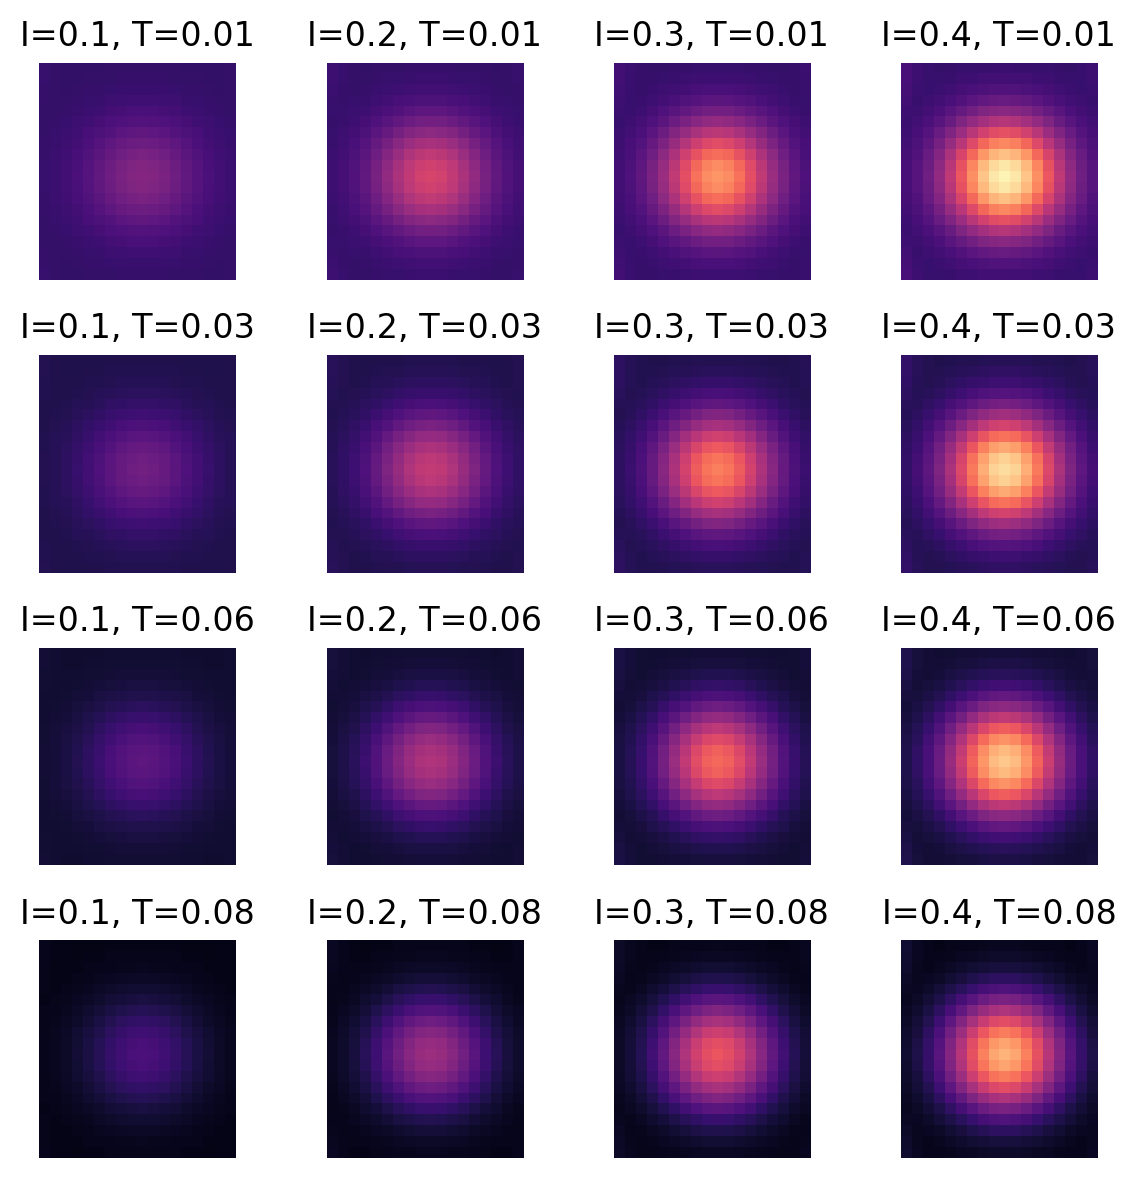

In [8]:
# Vary I and T 
all_Is = np.linspace(0.1, 0.4, 4)
all_Ts = np.linspace(0.01, 0.08, 4)

plt.figure(figsize=(6,6))
for I_idx in range(4):
    for T_idx in range(4):
        W, _ = update.calc_weight_mat(cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, velocity, all_Is[I_idx], sigma_sim, all_Ts[T_idx], use_GPU)
    
        plt.subplot(4,4,4*T_idx+I_idx+1)
        _ = plt.imshow(W[cell_idx].reshape(n_x, n_y), vmin=-0.1, vmax=0.4)
        _ = plt.title(f'I={np.round(all_Is[I_idx], 2)}, T={np.round(all_Ts[T_idx], 2)}')
        _ = plt.axis('off')
plt.tight_layout()

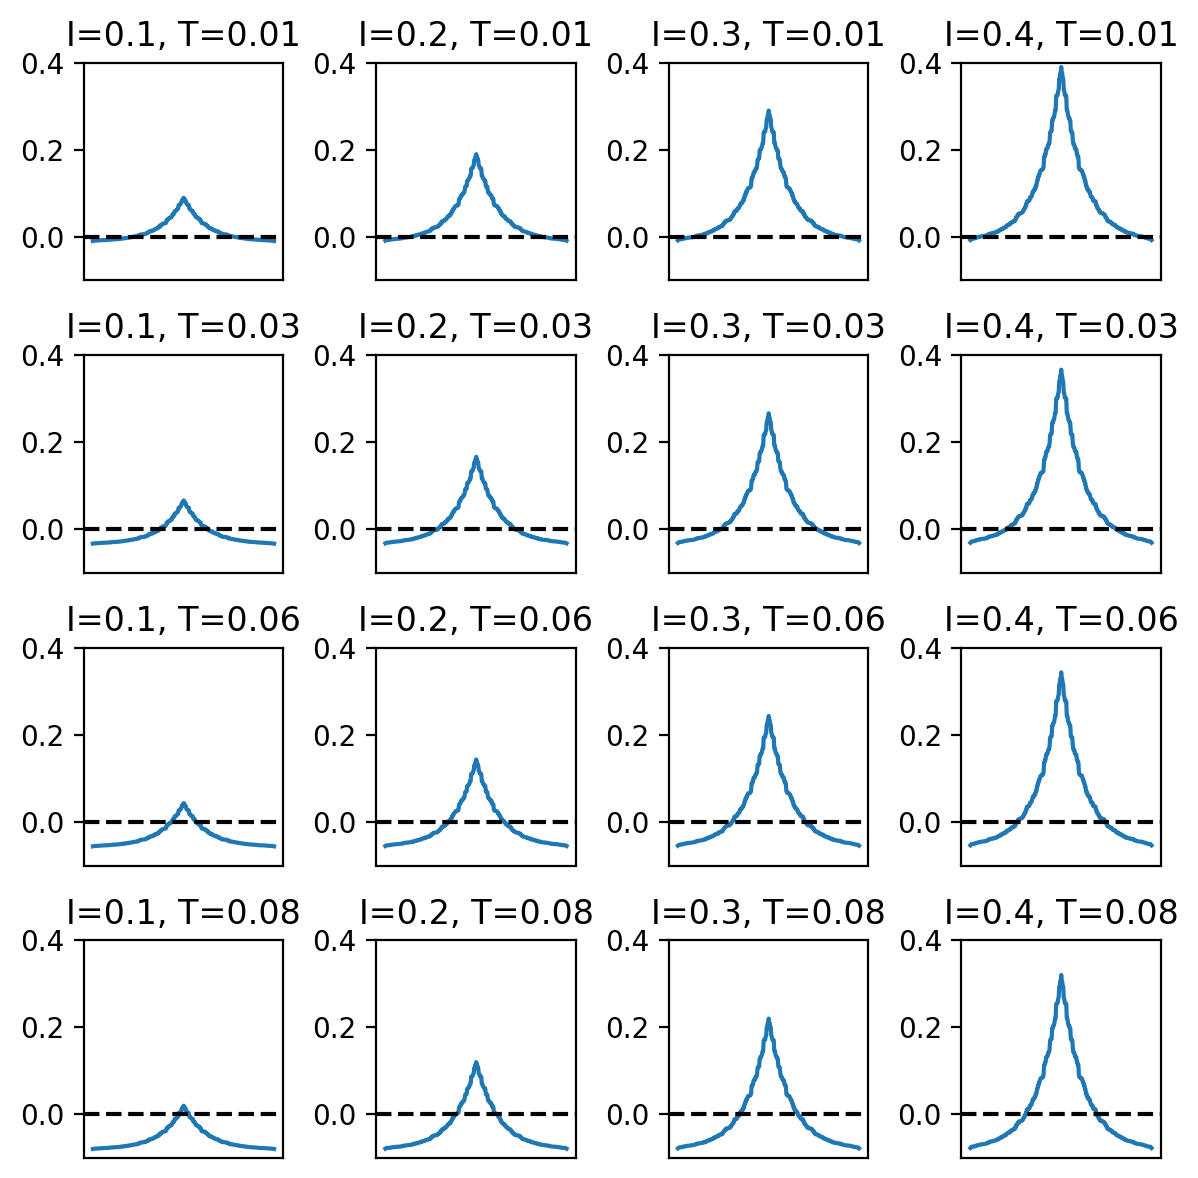

In [9]:
# Different way to plot the weights
this_cell_dist_from_all = initialize.calc_cell_position_diffs(cell_positions)[:, cell_idx, :]
this_cell_tri_dist = update.calc_tri_dist_squared(this_cell_dist_from_all, use_GPU)
sort_idxs = np.argsort(this_cell_tri_dist)
sort_idxs = np.concatenate((sort_idxs[::-2], sort_idxs[::2]))

plt.figure(figsize=(6,6))
for I_idx in range(4):
    for T_idx in range(4):
        W, _ = update.calc_weight_mat(cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, velocity, all_Is[I_idx], sigma_sim, all_Ts[T_idx], use_GPU)
        plt.subplot(4,4,4*T_idx+I_idx+1)
        _ = plt.plot(W[sort_idxs, cell_idx])
        _ = plt.title(f'I={np.round(all_Is[I_idx], 2)}, T={np.round(all_Ts[T_idx], 2)}')
        plt.ylim([-0.1, 0.4])
        plt.xticks([])
        plt.axhline(0, c='k', ls='dashed')
plt.tight_layout()

## Effect of velocity on weights

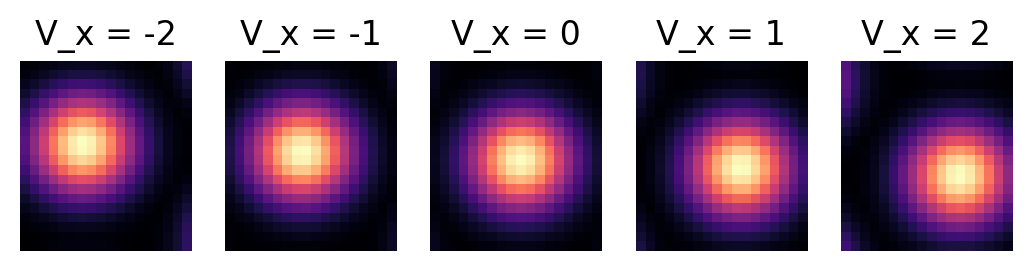

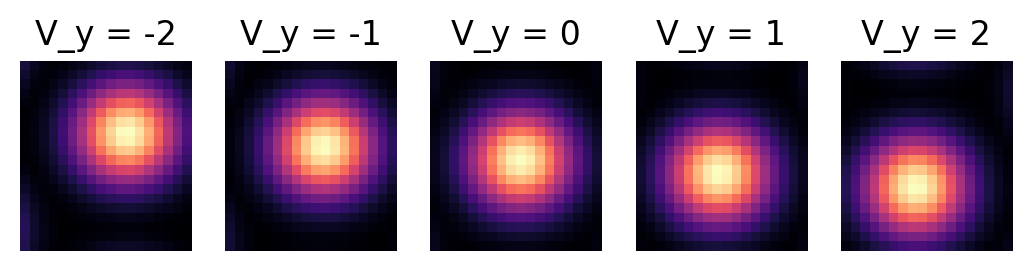

In [10]:
# Horizontal and vertical movements
plt.figure()
for v in range(5):
    velocity = np.zeros((2,1))
    velocity[0] = v-2
    W, _ = update.calc_weight_mat(cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, velocity, I_sim, sigma_sim, T_sim, use_GPU)

    plt.subplot(1,5,v+1)
    _ = plt.imshow(W[cell_idx].reshape(n_x, n_y))
    _ = plt.title(f'V_x = {v-2}')
    _ = plt.axis('off')
    
plt.figure()
for v in range(5):
    velocity = np.zeros((2,1))
    velocity[1] = v-2
    W, _ = update.calc_weight_mat(cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, velocity, I_sim, sigma_sim, T_sim, use_GPU)

    plt.subplot(1,5,v+1)
    _ = plt.imshow(W[cell_idx].reshape(n_x, n_y))
    _ = plt.title(f'V_y = {v-2}')
    _ = plt.axis('off')

# Run Simulation on Real Data

## Download Dataset

In [11]:
# Get the current working directory and check if the example dataset exists
file_name = "open_field.txt"
file_path = Path.cwd().joinpath(file_name)

if not file_path.exists():
    data_url = 'https://raw.githubusercontent.com/johnhwen1/ttgc/refs/heads/main/examples/open_field.txt'
    urllib.request.urlretrieve(data_url, filename=file_name)

data = []
with open(file_path, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        data.append(row)
        
csvfile.close()
pos_temp = helpers.str_to_float(np.array(data)).astype(float)

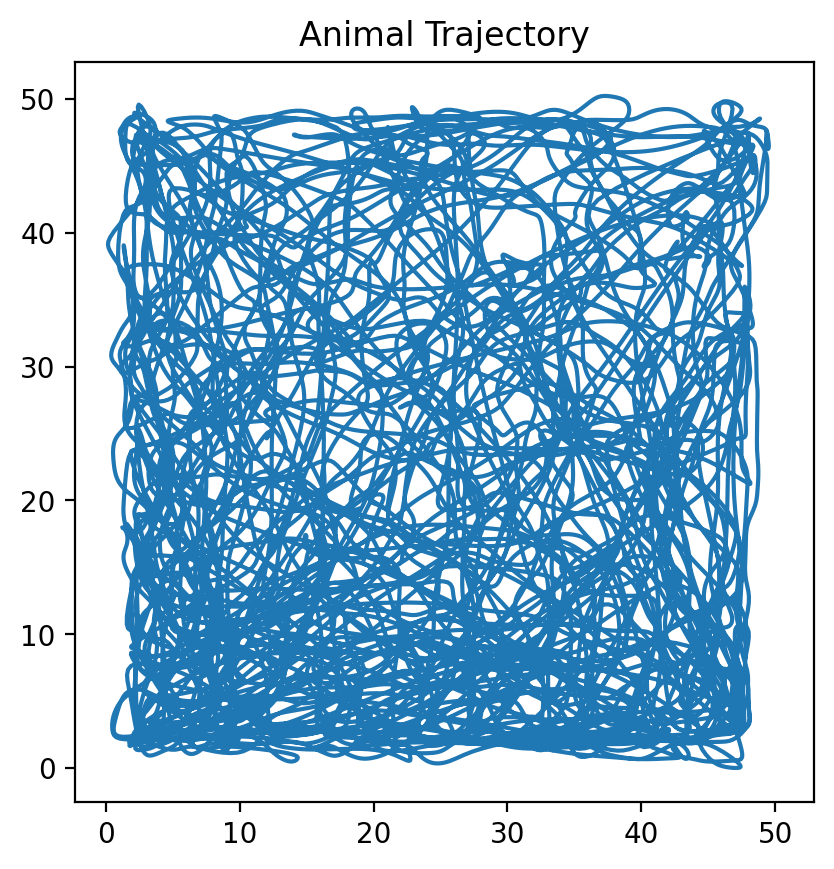

In [12]:
# Filter out non-moving data and get a portion of the data
velocity_temp = np.diff(pos_temp, axis=0)
speed_temp = np.linalg.norm(velocity_temp, axis=-1)
bins_moving = np.where(speed_temp > 0.15)[0]
n_timebins = 30000
pos_moving = pos_temp[bins_moving[:n_timebins+1],:]

# Smooth velocity
sigma_vel = 2
velocity = gaussian_filter1d(np.diff(pos_moving, axis=0).astype(float), sigma_vel, axis=0)
speed = np.linalg.norm(velocity, axis=-1)
pos = pos_moving[0,:] + np.cumsum(velocity, axis=0)

# Plot animal trajectory over time
plt.plot(pos[:,0], pos[:,1])
_ = plt.axis('square')
_ = plt.title('Animal Trajectory')

In [13]:
# Set common parameters
n_x = 10 # column n
n_y = 9 # row n
N = n_x * n_y

I_sim = 0.20
sigma_sim = 0.26
T_sim = 0.04
tau_sim = 0.9
start_pos = pos[0]

l_pos = np.empty(0)
n_ln = 1
l_lookahead = 10
alpha_hebb = 0
n_warmup_bins = 25
B0 = np.zeros((N))
beta_noise = 0
weight_noise = 0

l_pinning_n = 5
l_str = 0
l_use_nearby = False
output_bins = np.inf

## Alpha and Beta

In [14]:
n_alphas = 3
all_alphas = np.linspace(0.03, 0.09, n_alphas)
beta_sim = np.pi/6

In [15]:
# Initialize network
cell_positions = initialize.calc_cell_positions(n_y, n_x)
cell_position_diffs = initialize.calc_cell_position_diffs(cell_positions)
init_state = initialize.initialize_network(n_y, n_x, seed=1)

In [16]:
# Run simulations
n_timebins_sim = 10000
velocity_sim = velocity[:n_timebins_sim]
all_As, all_Bs = [np.zeros((n_alphas, n_timebins_sim, N)) for i in range(2)]
all_Ws = np.zeros((n_alphas, n_timebins_sim, N, N))

for a in range(n_alphas):
    alpha_sim = all_alphas[a]
    print(f'starting a={a}')

    (all_As[a], all_Bs[a], all_Ws[a],
     _, _, _, _, _) = run_sim.run_sim2d(init_state, cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, I_sim, sigma_sim, T_sim, tau_sim, 
                                        velocity_sim, start_pos, l_pos, l_str, n_ln, l_pinning_n, l_use_nearby, l_lookahead, alpha_hebb,
                                        n_warmup_bins, B0, use_GPU, beta_noise=beta_noise, weight_noise=weight_noise, W_input=None, W_l_input=None, seed=1, 
                                        output_bins=output_bins)

starting a=0


TypeError: initialize_W_l() missing 1 required positional argument: 'use_GPU'

In [ ]:
# Calculate maps
pos_sim = pos[:n_timebins_sim]
n_spatial_bins = 20
all_mean_maps = np.zeros((n_alphas, N, n_spatial_bins, n_spatial_bins))
for a in range(n_alphas):
    this_A = all_As[a]
    all_mean_maps[a] = helpers.calc_2d_maps(this_A, pos_sim, n_spatial_bins)

In [ ]:
# Plot maps
cell_idx = 0
plt.figure(figsize=(n_alphas*2, 2))
for a in range(n_alphas):
    plt.subplot(1, n_alphas, a+1)
    plt.imshow(all_mean_maps[a, cell_idx])
    plt.title(f'a={np.round(all_alphas[a], 2)}')
plt.tight_layout()

In [ ]:
# Plot population activity
n_bins_plot = 25
plt.figure(figsize=(n_bins_plot, 9))
for a in range(n_alphas):
    this_A = all_As[a]
    for t in range(n_bins_plot):
        plt.subplot(3,n_bins_plot,a*n_bins_plot+t+1)
        plt.imshow(this_A[5*t].reshape(n_x, n_y))
        plt.axis('off')
plt.tight_layout()

In [ ]:
n_betas = 3
all_betas = np.linspace(np.pi/6, np.pi/4, n_betas)
alpha_sim = 0.06

# Run simulations
n_timebins_sim = 10000
velocity_sim = velocity[:n_timebins_sim]
all_As, all_Bs = [np.zeros((n_betas, n_timebins_sim, N)) for i in range(2)]
all_Ws = np.zeros((n_betas, n_timebins_sim, N, N))

# Initialize network
cell_positions = initialize.calc_cell_positions(n_y, n_x)
cell_position_diffs = initialize.calc_cell_position_diffs(cell_positions)
init_state = initialize.initialize_network(n_y, n_x, seed=1)
B0 = np.zeros((N))

for b in range(n_betas):
    beta_sim = all_betas[b]
    print(f'starting b={b}')

    (all_As[b], all_Bs[b], all_Ws[b],
     _, _, _, _, _) = run_sim.run_sim2d(init_state, cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, I_sim, sigma_sim, T_sim, tau_sim, 
                                        velocity_sim, start_pos, l_pos, l_str, n_ln, l_pinning_n, l_use_nearby, l_lookahead, alpha_hebb,
                                        n_warmup_bins, B0, use_GPU, beta_noise=beta_noise, weight_noise=weight_noise, W_input=None, W_l_input=None, seed=1, 
                                        output_bins=output_bins)

In [ ]:
# Calculate maps
pos_sim = pos[:n_timebins_sim]
n_spatial_bins = 20
all_mean_maps = np.zeros((n_betas, N, n_spatial_bins, n_spatial_bins))
for b in range(n_betas):
    this_A = all_As[b]
    all_mean_maps[b] = helpers.calc_2d_maps(this_A, pos_sim, n_spatial_bins)

# Plot maps
cell_idx = 0
plt.figure(figsize=(n_betas*2, 2))
for b in range(n_betas):
    plt.subplot(1, n_betas, b+1)
    plt.imshow(all_mean_maps[b, cell_idx])
    plt.title(f'b={np.round(all_betas[b]/np.pi, 2)}*pi')
plt.tight_layout()

In [ ]:
# Plot population activity
n_bins_plot = 25
plt.figure(figsize=(n_bins_plot, 9))
for b in range(n_betas):
    this_A = all_As[b]
    for t in range(n_bins_plot):
        plt.subplot(3,n_bins_plot,b*n_bins_plot+t+1)
        plt.imshow(this_A[5*t].reshape(n_x, n_y))
        plt.axis('off')
plt.tight_layout()

# Run Experiments with Landmarks and Noise

In [ ]:
# Set common parameters
n_x = 10 # column n
n_y = 9 # row n
N = n_x * n_y

alpha_sim = 0.08
beta_sim = np.pi/6
I_sim = 0.20
sigma_sim = 0.26
T_sim = 0.04
tau_sim = 0.9
start_pos = pos[0]

# Generate pseudo-borders for border cells
l_pos = []
anchors = [25]
for ai in range(len(anchors)):
    i = anchors[ai]
    l_pos.append(np.array([i, -115]))
    l_pos.append(np.array([i, 164]))
    l_pos.append(np.array([-115, i]))
    l_pos.append(np.array([164, i]))
l_pos = np.array(l_pos)

n_ln = 1
l_lookahead = 122
alpha_hebb = 0
n_warmup_bins = 25
B0 = np.zeros((N))
beta_noise = np.pi/2048

l_pinning_n = 5
l_use_nearby = True
output_bins = np.inf

In [ ]:
# Sweep values for variables of interest
all_l_str = np.concatenate((np.arange(0,90,10), np.arange(100,400,100)))
n_l_str = all_l_str.size

all_weight_noises = np.concatenate((np.array([0]), np.linspace(I_sim/8, I_sim/5, 4)))
n_weight_noises = all_weight_noises.size

In [ ]:
# Initialize network
cell_positions = initialize.calc_cell_positions(n_y, n_x)
cell_position_diffs = initialize.calc_cell_position_diffs(cell_positions)
init_state = initialize.initialize_network(n_y, n_x, seed=1)

In [ ]:
n_timebins_sim = 30000
velocity_sim = velocity[:n_timebins_sim]
n_landmarks = l_pos.shape[0]

# Initialize output arrays
all_As, all_Bs = [np.zeros((n_weight_noises, n_l_str, n_timebins_sim, N)) for i in range(2)]
all_A_ls = np.zeros((n_weight_noises, n_l_str, n_timebins_sim, n_landmarks, n_ln))
all_Ws = np.zeros((n_weight_noises, n_timebins_sim, N, N)) # not affected by l_str
W_ls = np.zeros((n_landmarks, N)) # since no Hebbian plasticity, will use same landmar-grid weight matrix across all simulations
all_noisy_betas = np.zeros((n_weight_noises, n_l_str, n_timebins_sim))

# The weight calculation is by the far the computationally most expensive operation. 
# But, we actually don't need to calculate weight matrix each run, since it's dependent only on velocity, beta, and the weight noise.
# So, if the betas, velocities, and weight noises are the same between two runs, we can use the same weight matrix.
# Additionally, the landmark weight matrix is the same as long as l_pos is the same between two runs and there's no Hebbian plasticity.

# Precalculate the landmark weight matrix to be used across all runs
pre_v = np.ones((1, 2))
pre_n_warmup_bins = 0
(_, _, _, _, _, W_ls, _, _) = run_sim.run_sim2d(init_state, cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, I_sim, sigma_sim, T_sim, tau_sim, 
                                                pre_v, start_pos, l_pos, 0, n_ln, l_pinning_n, l_use_nearby, l_lookahead, alpha_hebb,
                                                pre_n_warmup_bins, B0, use_GPU, beta_noise=0, weight_noise=0, W_input=None, W_l_input=None, seed=1, output_bins=50000)

W_ls = np.tile(W_ls, (n_timebins, 1, 1, 1))

first_noise_iteration = True
for w in range(n_weight_noises):
    weight_noise = all_weight_noises[w]

    for l in range(n_l_str):
        print(f'starting w={w}, l={l}')
        l_str = all_l_str[l]

        if first_noise_iteration:
            (all_As[w,l], all_Bs[w,l], all_Ws[w],
             _, all_A_ls[w,l], _,
             all_noisy_betas[w,l,:], _) = run_sim.run_sim2d(init_state, cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, I_sim, sigma_sim, T_sim, tau_sim, 
                                                            velocity_sim, start_pos, l_pos, l_str, n_ln, l_pinning_n, l_use_nearby, l_lookahead, alpha_hebb,
                                                            n_warmup_bins, B0, use_GPU, beta_noise=beta_noise, weight_noise=weight_noise, W_input=None, W_l_input=W_ls, seed=1, 
                                                            output_bins=output_bins)
            first_noise_iteration = False

        else:
            W_input = all_Ws[w]
            
            (all_As[w,l], all_Bs[w,l], _,
             _, all_A_ls[w,l], _,
             all_noisy_betas[w,l,:], _) = run_sim.run_sim2d(init_state, cell_position_diffs, n_y, n_x, alpha_sim, beta_sim, I_sim, sigma_sim, T_sim, tau_sim, 
                                                            velocity_sim, start_pos, l_pos, l_str, n_ln, l_pinning_n, l_use_nearby, l_lookahead, alpha_hebb,
                                                            n_warmup_bins, B0, use_GPU, beta_noise=beta_noise, weight_noise=weight_noise, W_input=W_input, W_l_input=W_ls, seed=1, 
                                                            output_bins=output_bins)
    first_noise_iteration = True

